In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [2]:
os.chdir(r"C:\Users\abhed\OneDrive\Desktop\Advet\Imarticus\Python\Decision Tree")

In [3]:
os.listdir()

['diabetes.csv']

In [4]:
diab=pd.read_csv("diabetes.csv")

In [5]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### EDA

### Univariate and Missing Treatment

In [7]:
 def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [8]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

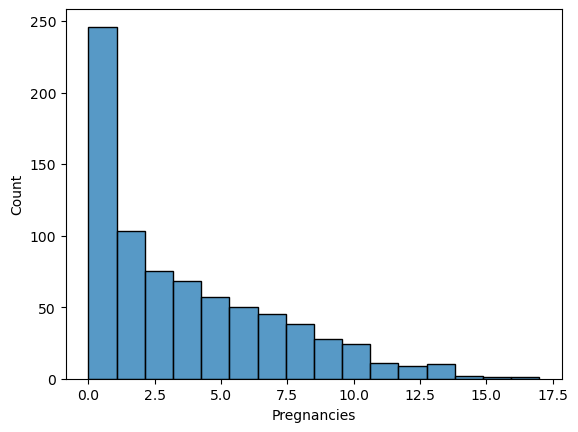

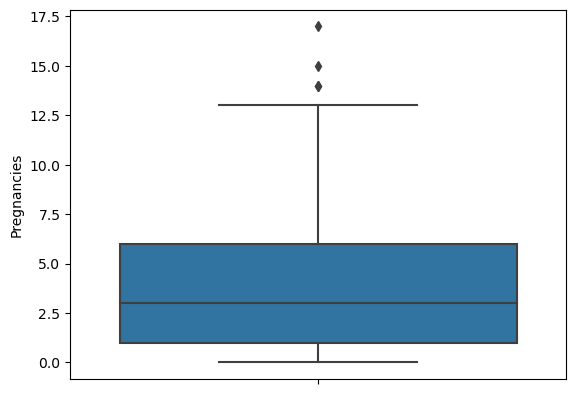

{'missing': 0,
 'min': 0,
 'max': 17,
 'mean': 3.85,
 'var': 11.35,
 'std': 3.37,
 'range': 17,
 'q1': 1.0,
 'q2': 3.0,
 'q3': 6.0,
 'skewness': 0.9,
 'kurtosis': 0.16}

In [9]:
univariate_num(diab,"Pregnancies")    #has outliers

In [10]:
diab["Pregnancies"]=np.where(diab["Pregnancies"]>9,9,diab["Pregnancies"])

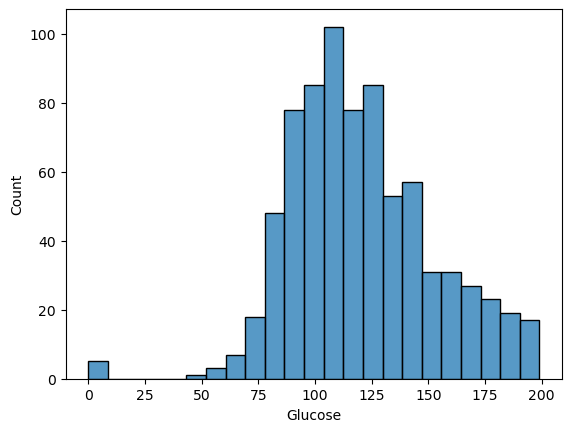

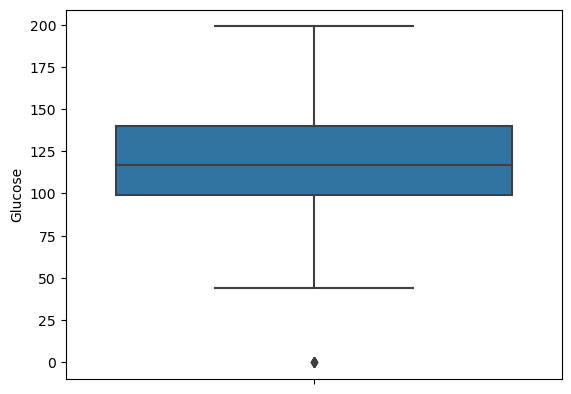

{'missing': 0,
 'min': 0,
 'max': 199,
 'mean': 120.89,
 'var': 1022.25,
 'std': 31.97,
 'range': 199,
 'q1': 99.0,
 'q2': 117.0,
 'q3': 140.25,
 'skewness': 0.17,
 'kurtosis': 0.64}

In [11]:
univariate_num(diab,"Glucose")   #lower outlier

In [12]:
diab["Glucose"]=diab["Glucose"].replace([0], diab["Glucose"].median())

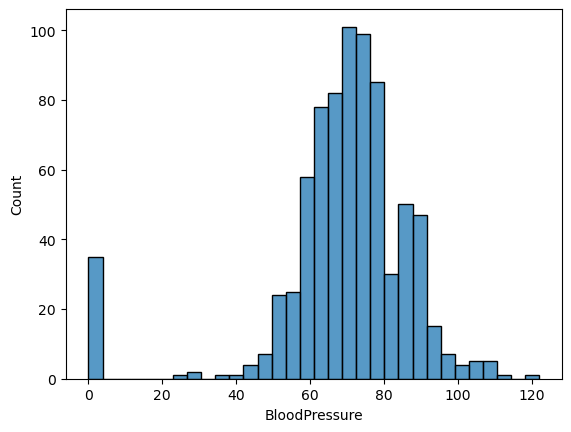

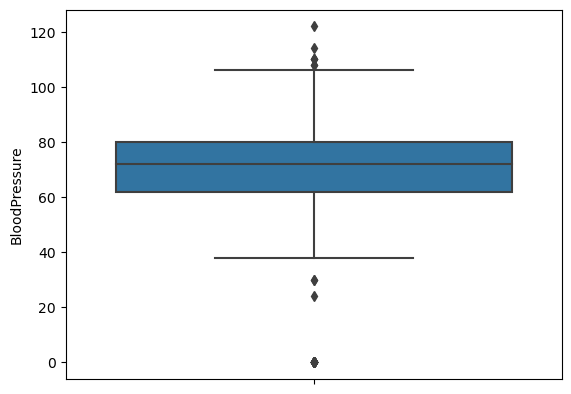

{'missing': 0,
 'min': 0,
 'max': 122,
 'mean': 69.11,
 'var': 374.65,
 'std': 19.36,
 'range': 122,
 'q1': 62.0,
 'q2': 72.0,
 'q3': 80.0,
 'skewness': -1.84,
 'kurtosis': 5.18}

In [13]:
univariate_num(diab,"BloodPressure")  #upper and lower outliers

In [14]:
def bpCheck(x):
    if x<80:
        return "low"
    elif x>=80 and x<=120:
        return "normal"
    elif x>120:
        return "high"

In [15]:
diab["BP_level"]=diab["BloodPressure"].apply(bpCheck)
diab["BP_level"]

0      low
1      low
2      low
3      low
4      low
      ... 
763    low
764    low
765    low
766    low
767    low
Name: BP_level, Length: 768, dtype: object

In [16]:
diab.drop(columns=["BloodPressure"], inplace=True)

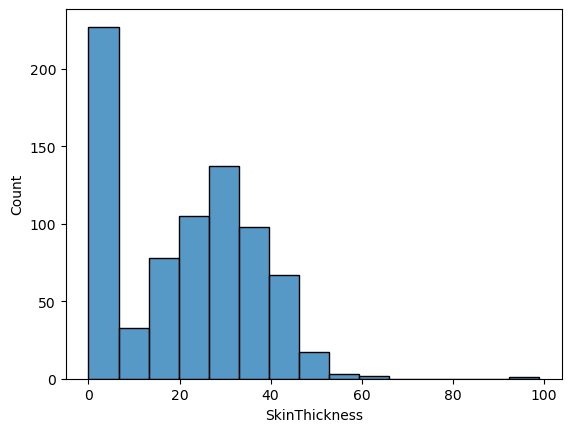

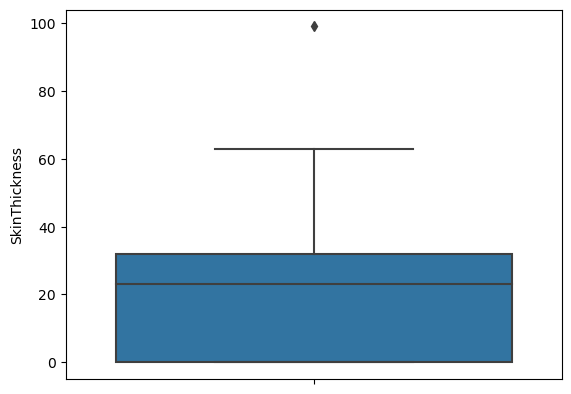

{'missing': 0,
 'min': 0,
 'max': 99,
 'mean': 20.54,
 'var': 254.47,
 'std': 15.95,
 'range': 99,
 'q1': 0.0,
 'q2': 23.0,
 'q3': 32.0,
 'skewness': 0.11,
 'kurtosis': -0.52}

In [17]:
univariate_num(diab,"SkinThickness")  #has outliers

In [18]:
diab["SkinThickness"]=diab["SkinThickness"].replace([0], diab["SkinThickness"].median())

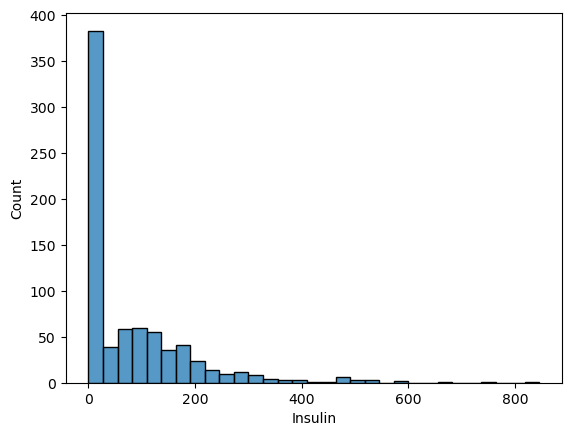

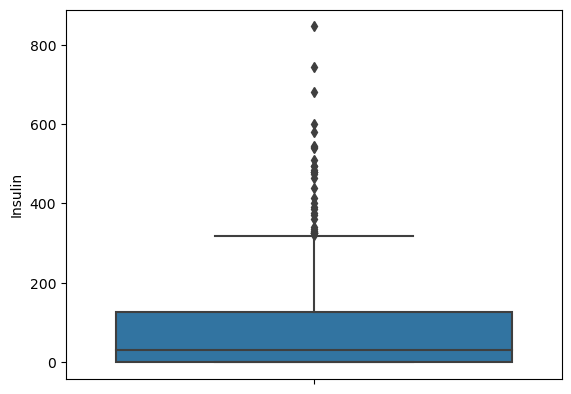

{'missing': 0,
 'min': 0,
 'max': 846,
 'mean': 79.8,
 'var': 13281.18,
 'std': 115.24,
 'range': 846,
 'q1': 0.0,
 'q2': 30.5,
 'q3': 127.25,
 'skewness': 2.27,
 'kurtosis': 7.21}

In [19]:
univariate_num(diab,"Insulin")

In [20]:
diab["Insulin"]=diab["Insulin"].replace([0], diab["Insulin"].median())

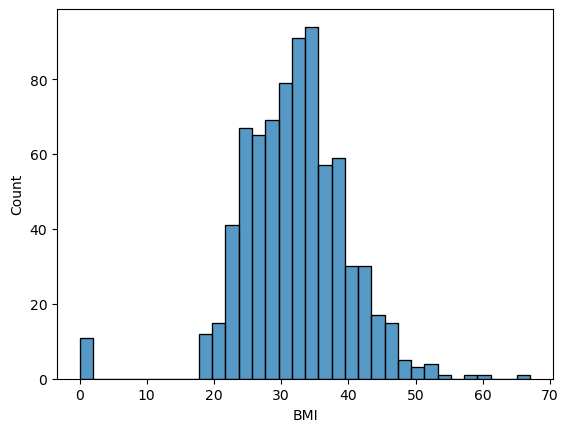

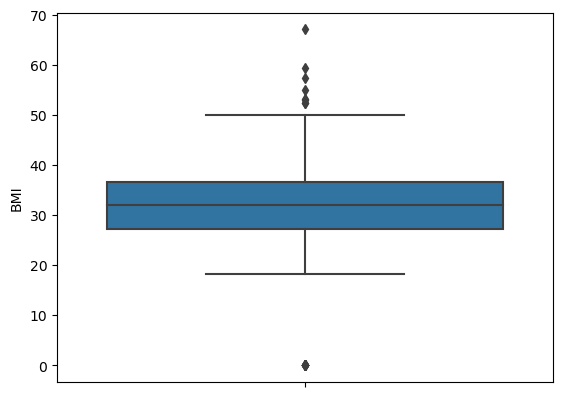

{'missing': 0,
 'min': 0.0,
 'max': 67.1,
 'mean': 31.99,
 'var': 62.16,
 'std': 7.88,
 'range': 67.1,
 'q1': 27.3,
 'q2': 32.0,
 'q3': 36.6,
 'skewness': -0.43,
 'kurtosis': 3.29}

In [21]:
univariate_num(diab,"BMI")    #has lower outliers

In [22]:
diab["BMI"]=diab["BMI"].replace([0], diab["BMI"].median())

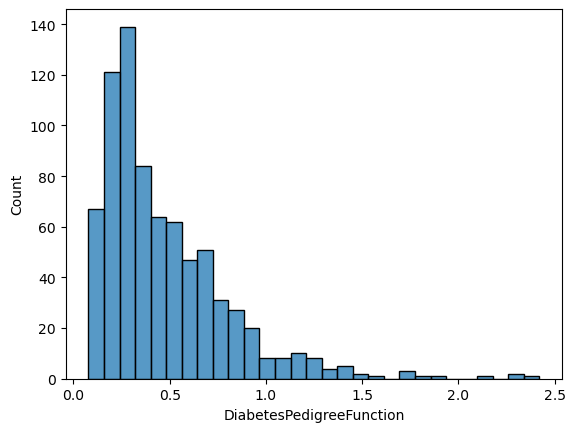

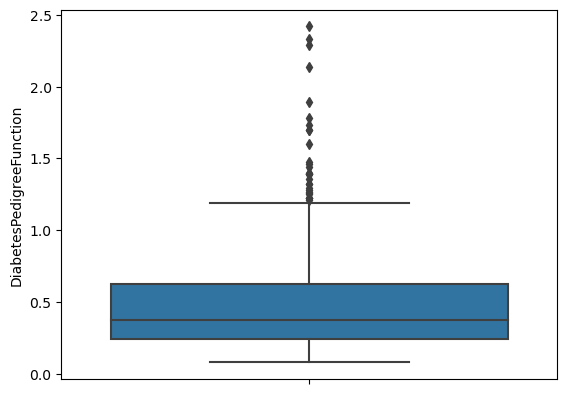

{'missing': 0,
 'min': 0.08,
 'max': 2.42,
 'mean': 0.47,
 'var': 0.11,
 'std': 0.33,
 'range': 2.34,
 'q1': 0.24,
 'q2': 0.37,
 'q3': 0.63,
 'skewness': 1.92,
 'kurtosis': 5.59}

In [23]:
univariate_num(diab,"DiabetesPedigreeFunction")  #has outliers

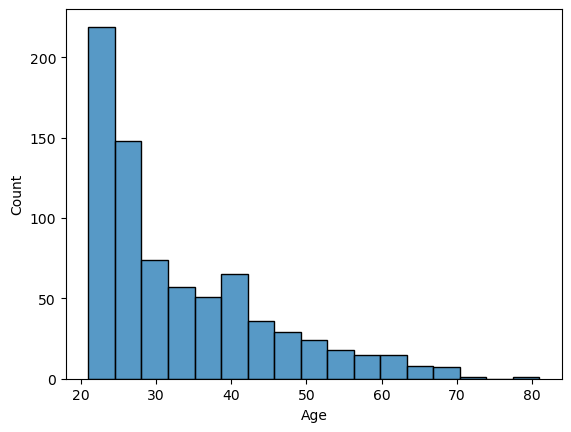

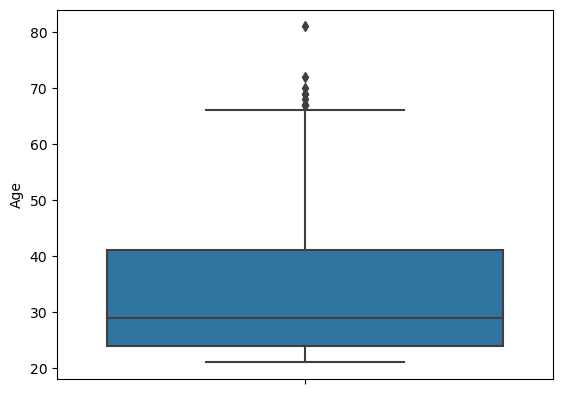

{'missing': 0,
 'min': 21,
 'max': 81,
 'mean': 33.24,
 'var': 138.3,
 'std': 11.76,
 'range': 60,
 'q1': 24.0,
 'q2': 29.0,
 'q3': 41.0,
 'skewness': 1.13,
 'kurtosis': 0.64}

In [24]:
univariate_num(diab,"Age")    #has outliers

### Bivariate

#### Num to num

C:\Users\abhed\AppData\Local\Temp\ipykernel_12740\1258511892.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr=diab.corr()


<AxesSubplot:>

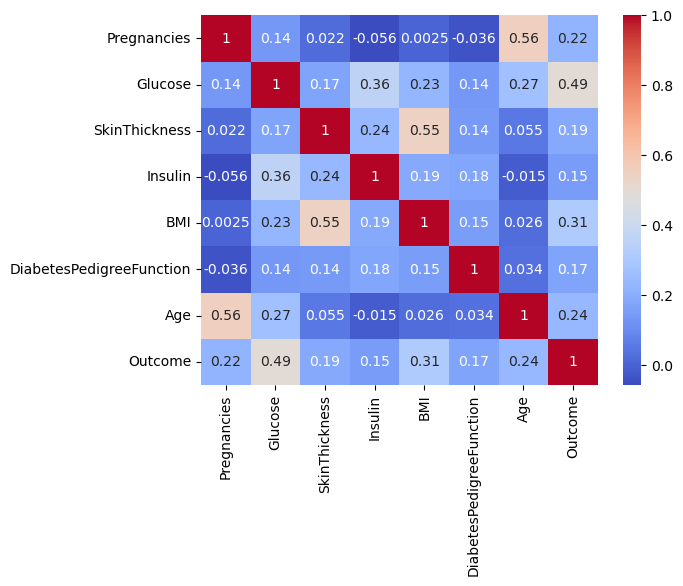

In [25]:
cr=diab.corr()

sns.heatmap(cr, annot=True, cmap="coolwarm")   #no highly correlated features

### MVT

In [26]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BP_level                    0
dtype: int64

In [27]:
#diab["Glucose"]=diab["Glucose"].fillna(diab["Glucose"].median(), inplace=True)
#diab["Glucose"]

### Outlier Treatment

In [28]:
var="BMI"

q1=diab[var].quantile(.25)
q3=diab[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

diab[var]=np.where(diab[var]>=upper_cap, upper_cap,diab[var] )
diab[var]=np.where(diab[var]<=lower_cap, lower_cap, diab[var])

In [29]:
var="SkinThickness"

q1=diab[var].quantile(.25)
q3=diab[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

diab[var]=np.where(diab[var]>=upper_cap, upper_cap,diab[var] )
diab[var]=np.where(diab[var]<=lower_cap, lower_cap, diab[var])

In [30]:
var="Insulin"

q1=diab[var].quantile(.25)
q3=diab[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

diab[var]=np.where(diab[var]>=upper_cap, upper_cap,diab[var] )
diab[var]=np.where(diab[var]<=lower_cap, lower_cap, diab[var])

In [32]:
var="DiabetesPedigreeFunction"

q1=diab[var].quantile(.25)
q3=diab[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

diab[var]=np.where(diab[var]>=upper_cap, upper_cap,diab[var] )
diab[var]=np.where(diab[var]<=lower_cap, lower_cap, diab[var])

### Dummy Creation

In [33]:
diab1=pd.get_dummies(diab, drop_first=True)

### Model 

In [34]:
x=diab1.drop(columns=["Outcome"])
y=diab1["Outcome"]

In [35]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt=DecisionTreeClassifier()

In [38]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
dt.score(x_train, y_train)

1.0

In [40]:
dt.score(x_test, y_test)

0.7402597402597403

#### Grid Search

In [41]:
param={"criterion":["gini","entropy"],
      "max_depth":[5,7,9,11],
      "min_samples_split":[20,50,100,120,150],
      "min_samples_leaf":[10,20,50,80,100]}

dtg=DecisionTreeClassifier(random_state=0)

gd=GridSearchCV(estimator=dtg,param_grid=param,cv=10,n_jobs=-1,verbose=2)
gd.fit(x_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [10, 20, 50, 80, 100],
                         'min_samples_split': [20, 50, 100, 120, 150]},
             verbose=2)

In [42]:
gd.best_params_
gd.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=100,
                       random_state=0)

In [43]:
dt_new=DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=100, random_state=0)

dt_new.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=100,
                       random_state=0)

In [44]:
dt_new.score(x_test, y_test)

0.7532467532467533

In [45]:
dt_new.score(x_train, y_train)

0.7783985102420856

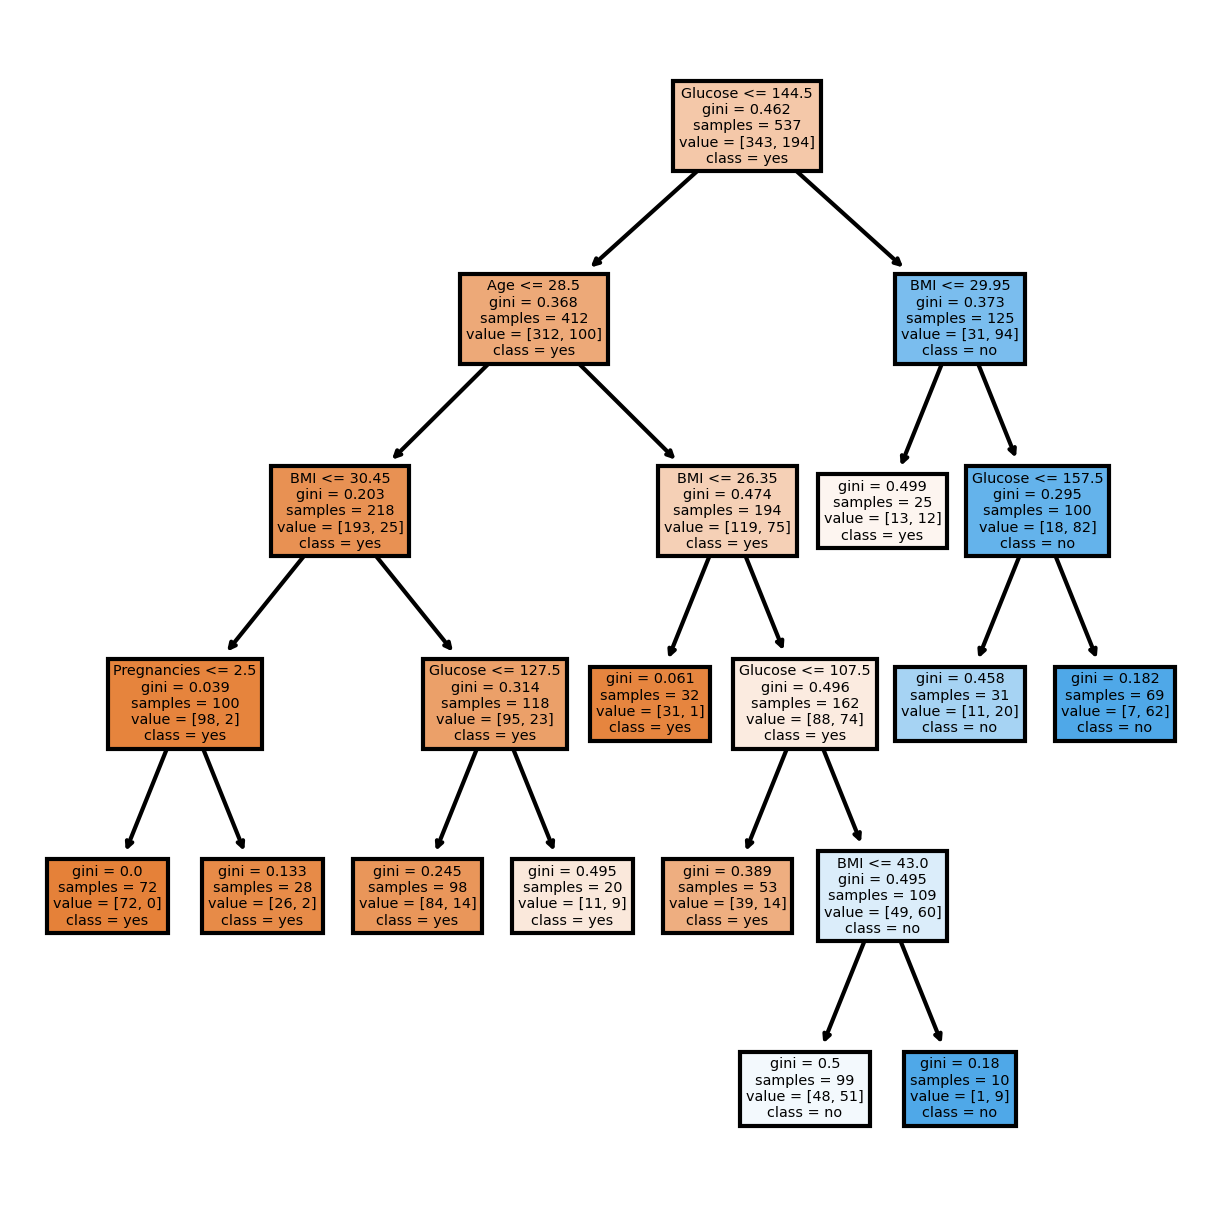

In [46]:
from sklearn.tree import plot_tree
fn=x.columns
cn=["yes","no"]

fig,axes=plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=300)

dt_plot=plot_tree(dt_new, feature_names=fn, class_names=cn, filled=True)

In [47]:
featImp=pd.DataFrame({"Variables":x_train.columns,
                     "imp":dt_new.feature_importances_}).sort_values(by=["imp"], ascending=False)
featImp

,Variables,imp
1,Glucose,0.632688
4,BMI,0.208967
6,Age,0.156228
0,Pregnancies,0.002117
2,SkinThickness,0.000000
3,Insulin,0.000000
5,DiabetesPedigreeFunction,0.000000
7,BP_level_low,0.000000
8,BP_level_normal,0.000000


In [48]:
dt1=DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=100, random_state=0)

x_train1=x_train[["Glucose","BMI","Age","Pregnancies"]]
x_test1=x_test[["Glucose","BMI","Age","Pregnancies"]]

dt1.fit(x_train1, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=100,
                       random_state=0)

In [49]:
dt1.score(x_train1, y_train)

0.7783985102420856

In [50]:
dt1.score(x_test1, y_test)

0.7532467532467533

In [53]:
from sklearn.tree import export_text

rules=export_text(dt1, feature_names=x_train1.columns.to_list())
print(rules)

|--- Glucose <= 144.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.45
|   |   |   |--- Pregnancies <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  2.50
|   |   |   |   |--- class: 0
|   |   |--- BMI >  30.45
|   |   |   |--- Glucose <= 127.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  127.50
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 107.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  107.50
|   |   |   |   |--- BMI <= 43.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- BMI >  43.00
|   |   |   |   |   |--- class: 1
|--- Glucose >  144.50
|   |--- BMI <= 29.95
|   |   |--- class: 0
|   |--- BMI >  29.95
|   |   |--- Glucose <= 157.50
|   |   |   |--- class: 1
|   |   |--- Glucose >  157.50
|   |   |   |--- class: 1



In [57]:
pred_train=dt1.predict(x_train1)
pred_test=dt1.predict(x_test1)

In [58]:
prob_train1=dt1.predict_proba(x_train1)[:,1]
prob_test1=dt1.predict_proba(x_test1)[:,1]

In [62]:
def class_metrics(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    auc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 Score":f1, "AUC":auc1}
    
    tpr, fpr, threshold=metrics.roc_curve(act, pred)
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.show()
    return result

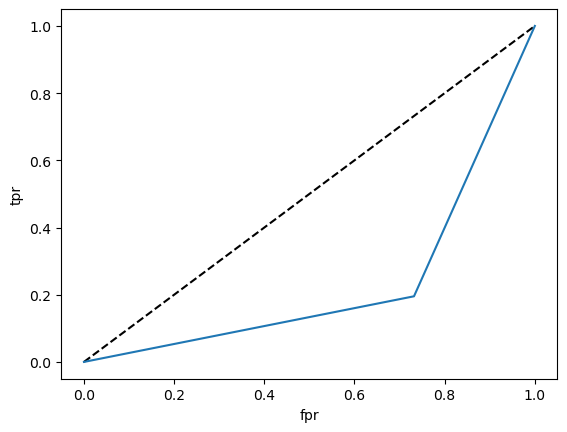

{'Accuracy': 0.7783985102420856,
 'Recall': 0.7319587628865979,
 'Precision': 0.6794258373205742,
 'F1 Score': 0.7047146401985113,
 'AUC': 0.768311742959334}

In [63]:
class_metrics(y_train, pred_train, prob_train1)

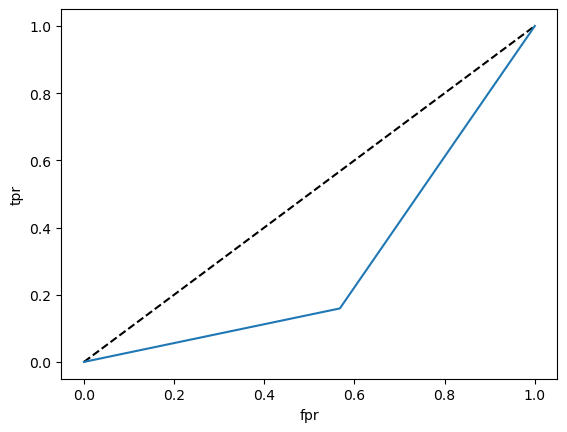

{'Accuracy': 0.7532467532467533,
 'Recall': 0.5675675675675675,
 'Precision': 0.6268656716417911,
 'F1 Score': 0.5957446808510638,
 'AUC': 0.7041659493888793}

In [64]:
class_metrics(y_test, pred_test, prob_test1)